## Testing the pelican-ipynb plugin

I'm writing this in a Jupyter (formerly IPython) notebook, to test out the functionality of the [`pelican-ipython`](https://github.com/danielfrg/pelican-ipynb) plugin, which allows notebooks to be used as input for the `pelican` static site generator.

I've been wanting to get into a regular habit of blogging, and this format should allow me to incorporate all of the pieces I think I might need.

As an example, let me inlcude some python. I've been experimenting with generating op-art using matplotlib.

In [1]:
import numpy as np
import matplotlib as mpl

%matplotlib inline

First, a circle that has gradients from one color to another. This can be used to make circles with fuzzy edges.

In [2]:
def circle_gradient(rad1, rad2, color1, color2, nsteps, center=(0,0)):
    circles = []
    
    radii = np.linspace(rad1, rad2, nsteps)
    
    c1vec = np.array(color1)
    c2vec = np.array(color2)
    cdirection = c2vec - c1vec
    
    for i, radius in enumerate(radii):
        circ = mpl.patches.Circle(center, radius=radius)
        color = tuple(c1vec+cdirection*float(i)/float(nsteps))
        circ.set_facecolor(color)
        circ.set_edgecolor(color)
        if rad1 < rad2:
            circ.set_zorder(-i)
        circles.append(circ)
    
    return circles

Now, let's make a grid of them.

In [3]:
def circle_grid(colors, ncircs=10, bgcol=4, oddouter=1, oddinner=2, evenouter=3, eveninner=5, ngrad=25, annulus=0.0):
    fig, ax = mpl.pyplot.subplots()
    fig.set_figheight(8.0)
    fig.set_figwidth(8.0)
    ax.set_xlim((-10.0, 10.0))
    ax.set_ylim((-10.0, 10.0))
    ax.set_aspect(1)
    circs = []

    #background color
    background = mpl.patches.Rectangle((-10,-10), 20, 20)
    background.set_facecolor(colors[bgcol])
    background.set_edgecolor(colors[bgcol])
    ax.add_artist(background)

    circfrac = 10.0/ncircs
    
    gridpoints = np.linspace(-(10-circfrac),10-circfrac,ncircs)

    outer = 0.95*circfrac
    mid = 0.65*circfrac
    inmid = mid - annulus*circfrac
    inner = 0.0*circfrac

    for i,x in enumerate(gridpoints):
        for j,y in enumerate(gridpoints):
            if bool(i%2) ^ bool(j%2):
                circs.extend(circle_gradient(outer, mid, colors[bgcol], colors[oddouter], ngrad, center=(x,y)))
                circs.extend(circle_gradient(inmid, inner, colors[oddouter], colors[oddinner], ngrad, center=(x,y)))
            else:
                circs.extend(circle_gradient(outer, mid, colors[bgcol], colors[evenouter], ngrad, center=(x,y)))
                circs.extend(circle_gradient(inmid, inner, colors[evenouter], colors[eveninner], ngrad, center=(x,y)))

    for circ in circs:
        ax.add_artist(circ)
    ax.set_axis_off()

We'll make use of a color palette from [colourlovers](http://www.colourlovers.com/palette/711595/Solar_Flare)

In [4]:
solar_flare = [(12/255.0, 2/255.0, 16/255.0),
                (138/255.0, 7/255.0, 8/255.0),
                (222.0/255, 48.0/255, 15.0/255),
                (247.0/255, 119.0/255, 28.0/255),
                (247.0/255, 204.0/255, 50.0/255)]

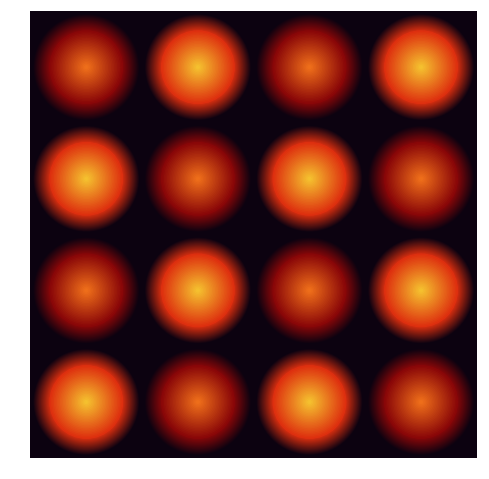

In [5]:
circle_grid(solar_flare, ncircs=4, bgcol=0, oddouter=1, oddinner=3, evenouter=2, eveninner=4)